In [1]:
#Workbench imports
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.optimize import brentq

from pathlib import Path

### Load results from EMA Workbench run (see notebook 30), inspect and clean the raw results

In [2]:
from ema_workbench import load_results

target = Path("temp","experiments")
experiments, outcomes = load_results(target / "2021_2_23_EMA_experiments_five_hundred.tar.gz")
experiments.tail()

C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\urban-SETP\lib\site-packages\ema_workbench\em_framework\evaluators.py:21: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn(
C:\Users\Ginkel\AppData\Local\Continuum\anaconda3\envs\urban-SETP\lib\site-packages\ema_workbench\em_framework\optimization.py:48: ImportWarning: platypus based optimization not available
  warnings.warn("platypus based optimization not available", ImportWarning)


,Housing_market,SLR,implementation_time,transient,Mayor,scenario,policy,model
395995,rational,1,4,SurgeHeight\five_hundred\five_hundred_430.csv,Lawkeeper,98995,3,Rotty
395996,rational,3,13,SurgeHeight\five_hundred\five_hundred_453.csv,Lawkeeper,98996,3,Rotty
395997,boundedly_rational,3,10,SurgeHeight\five_hundred\five_hundred_157.csv,Lawkeeper,98997,3,Rotty
395998,boundedly_rational,5,11,SurgeHeight\five_hundred\five_hundred_32.csv,Lawkeeper,98998,3,Rotty
395999,rational,6,4,SurgeHeight\five_hundred\five_hundred_308.csv,Lawkeeper,98999,3,Rotty


In [3]:
experiments2 = experiments.drop(['policy','model'],axis=1)
experiments2.head()

,Housing_market,SLR,implementation_time,transient,Mayor,scenario
0,boundedly_rational,4,12,SurgeHeight\five_hundred\five_hundred_119.csv,R. Active,0
1,boundedly_rational,4,14,SurgeHeight\five_hundred\five_hundred_90.csv,R. Active,1
2,boundedly_rational,2,10,SurgeHeight\five_hundred\five_hundred_220.csv,R. Active,2
3,boundedly_rational,9,9,SurgeHeight\five_hundred\five_hundred_141.csv,R. Active,3
4,rational,5,13,SurgeHeight\five_hundred\five_hundred_7.csv,R. Active,4


In [10]:
experiments2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396000 entries, 0 to 395999
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Housing_market       396000 non-null  category
 1   SLR                  396000 non-null  category
 2   implementation_time  396000 non-null  category
 3   transient            396000 non-null  category
 4   Mayor                396000 non-null  category
 5   scenario             396000 non-null  category
dtypes: category(6)
memory usage: 7.1 MB


# Regional sensitivity analysis
   

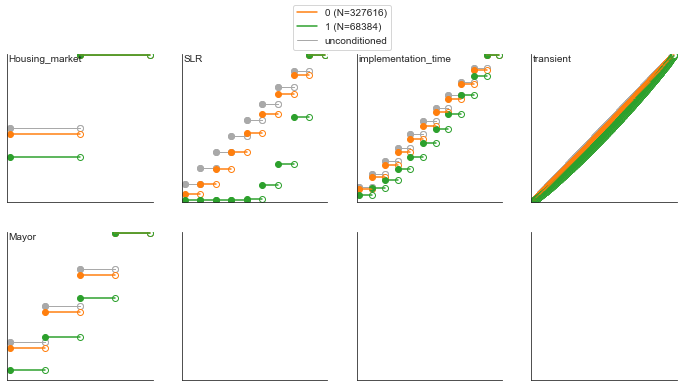

In [8]:
from ema_workbench.analysis import regional_sa
from numpy.lib import recfunctions as rf

sns.set_style('white')

# model is the same across experiments
x = experiments2.copy()
y = outcomes['CC_first_SETP'] < 2200
fig = regional_sa.plot_cdfs(x,y)
sns.despine()
plt.show()